PRIMER PARCIAL

In [1399]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV,RandomizedSearchCV
import math
from RegscorePy import *

In [1400]:
csvToyota= pd.read_csv("ToyotaCorolla_modificado.csv")

csvToyota.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1436.0,NaN,NaN,NaN,721.555014,416.47689,1.0,361.75,721.5,1081.25,1442.0
Model,1436,372,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,1436.0,NaN,NaN,NaN,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.0,32500.0
Age_08_04,1436.0,NaN,NaN,NaN,55.947075,18.599988,1.0,44.0,61.0,70.0,80.0
Mfg_Month,1436.0,NaN,NaN,NaN,5.548747,3.354085,1.0,3.0,5.0,8.0,12.0
Mfg_Year,1436.0,NaN,NaN,NaN,1999.625348,1.540722,1998.0,1998.0,1999.0,2001.0,2004.0
KM,1436.0,NaN,NaN,NaN,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
Fuel_Type,1436,3,Petrol,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,1436.0,NaN,NaN,NaN,101.502089,14.98108,69.0,90.0,110.0,110.0,192.0
Met_Color,1436.0,NaN,NaN,NaN,0.674791,0.468616,0.0,0.0,1.0,1.0,1.0


VARIABLES

 <ul>
 <li style="color:red">ID: Identificador - SE VA</li>
 <li style="color:red">MODEL: modelo - SE VA porque la información que proporciona se encuentra en otras variables</li>
<li style="color:red">AGE_08_04: año y mes de fabricación juntos - SE VA, ya tenemos el año y el mes de fabricación se parados</li>
<li style="color:yellow">MFG_MONTH: mes de fabricación - a evaluar</li>
<li>MFG_ YEAR: año de fabricación</li>
<li>KM: Kilometraje</li>
<li style="color:yellow">FUEL_TYPE: tipo de combustible - tratar porque es variable categórica, a evaluar las variables separadas</li>
<li>HP: cantidad de caballos de fuerza</li>
<li style="color:yellow">MET_COLOR: si tiene o no color metalizado - a evaluar</li>
<li>AUTOMATIC: si tiene o no caja automatica</li>
<li>CC: cantidad de cilindradas</li>
<li>DOORS: cantidad de puertas</li>
<li style="color:red">CYLINDERS: cantidad de cilindros - SE VA por ser deterministica = 4</li>
<li>GEARS: cantidad de engranes</li>
<li>QUARTERLY_TAX: impuestos</li>
<li style="color:red">WEIGHT: peso - se va</li>
<li>MFR_GUARANTEE: si tiene o no garantía de fábrica</li>
<li>BOVAG_GUARANTEE: garantía BOVAG</li>
<li>GUARANTEE_PERIOD: periodo de garantía</li>
<li>ABS: si tiene o no tipo de frenos ABS</li>
<li>AIRBAG_1: si tiene o no un airbag en puesto de piloto</li>
<li>AIRBAG_2: si tiene o no un airbag en el puesto de copiloto</li>
<li>AIRCO: si tiene o no aire acondicionado</li>
<li>AUTOMATIC_AIRCO: si tiene o no aire acondicionado automático</li>
<li>BOARDCOMPUTER: si tiene o no una computadora de mando</li>
<li style="color:yellow">CD_PLAYER: si tiene o no reproductor de CD - a evaluar</li>
<li>CENTRAL_LOCK: si tiene o no bloqueo centralizado</li>
<li>POWERED_WINDOWS: si tiene o no levanta cristales electrico</li>
<li>POWER_STEERING: si tiene o no dirección asistida</li>
<li style="color:yellow">RADIO: si tiene o no radio - a evaluar</li>
<li>MISTLAMPS: si tiene o no antinieblas</li>
<li>SPORT_MODEL: si es o no un modelo deportivo</li>
<li style="color:yellow">BACKSEAT_DIVIDER: si tiene o no divisor de asiento trasero - a evaluar</li>
<li>METALLIC_RIM: si tiene o no rines metalicos</li>
<li style="color:yellow">RADIO_CASSETTE: si tiene o no radio cassette - a evaluar</li>
<li>TOW_BAR: si tiene o no barra de remolque</li>
 </ul>

<h1>MATRIZ DE CORRELACION</h1>

In [1401]:
correlations = csvToyota.corr()
correlations.style.background_gradient(cmap='coolwarm') 

c:\Users\USUARIO\.conda\envs\datamining\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\USUARIO\.conda\envs\datamining\lib\site-packages\pandas\io\formats\style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,-0.130207,nan,-0.043343,-0.240821,-0.414500,-0.162006,-0.015065,-0.086256,-0.461437,-0.123465,-0.358316,-0.386207,-0.327468,-0.695207,-0.464520,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,nan,0.063104,0.219197,0.581198,0.197802,0.028133,0.146627,0.306138,0.093588,0.248974,0.429259,0.588262,0.601292,0.481374,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,nan,-0.005364,-0.198431,-0.470253,-0.164658,0.006865,-0.152563,-0.412887,-0.105406,-0.329017,-0.403600,-0.426259,-0.719449,-0.510895,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,nan,-0.013063,0.031373,-0.002167,-0.005771,-0.003863,0.029010,0.072532,0.003756,0.076749,0.057088,-0.049017,0.017715,-0.016736,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,nan,0.007766,0.193934,0.473478,0.166697,-0.006206,0.148218,0.402215,0.105359,0.317075,0.395674,0.437718,0.720567,0.517008,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,nan,0.015023,0.278165,-0.028598,-0.212851,0.001438,-0.138942,-0.177203,-0.018012,-0.139275,-0.133057,-0.258221,-0.353862,-0.266826,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,nan,0.209477,-0.298432,0.089614,0.140026,0.022701,0.076163,0.057832,0.025137,0.017644,0.241134,0.244957,0.129715,0.102300,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,nan,0.018601,0.011326,0.057929,0.154850,0.010783,0.009295,0.022298,0.100055,0.038416,0.114190,0.027977,0.089886,0.198220,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,nan,-0.098555,-0.055371,0.057249,0.026194,0.023393,-0.002256,-0.016128,-0.011895,0.001171,-0.028353,0.059057,-0.037069,-0.010967,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,nan,0.014629,0.306996,0.335637,-0.057407,-0.081725,-0.017683,0.037806,0.022678,0.024738,0.119888,0.162669,0.009312,0.057787,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [1402]:
columns_to_delete=["Id","Model","Age_08_04","Cylinders","Weight","Radio_cassette","Power_Steering","Gears","Automatic","Radio",
                   "Power_Steering","BOVAG_Guarantee","Mfg_Month"]

df_test=csvToyota.drop(columns=columns_to_delete)
df_test.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,1436.0,NaN,NaN,NaN,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.0,32500.0
Mfg_Year,1436.0,NaN,NaN,NaN,1999.625348,1.540722,1998.0,1998.0,1999.0,2001.0,2004.0
KM,1436.0,NaN,NaN,NaN,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
Fuel_Type,1436,3,Petrol,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,1436.0,NaN,NaN,NaN,101.502089,14.98108,69.0,90.0,110.0,110.0,192.0
Met_Color,1436.0,NaN,NaN,NaN,0.674791,0.468616,0.0,0.0,1.0,1.0,1.0
cc,1436.0,NaN,NaN,NaN,1576.85585,424.38677,1300.0,1400.0,1600.0,1600.0,16000.0
Doors,1436.0,NaN,NaN,NaN,4.033426,0.952677,2.0,3.0,4.0,5.0,5.0
Quarterly_Tax,1436.0,NaN,NaN,NaN,87.122563,41.128611,19.0,69.0,85.0,85.0,283.0
Mfr_Guarantee,1436.0,NaN,NaN,NaN,0.409471,0.491907,0.0,0.0,0.0,1.0,1.0


In [1403]:
df_test.shape

(1436, 25)

<h1>ANALISIS DE LA VARIABLE OBJETIVO: PRICE</h1>

{'whiskers': [<matplotlib.lines.Line2D at 0x220d9d950f0>,
 'caps': [<matplotlib.lines.Line2D at 0x220d9d95690>,
 'boxes': [<matplotlib.lines.Line2D at 0x220d9d94f40>],
 'medians': [<matplotlib.lines.Line2D at 0x220d9d95c30>],
 'fliers': [<matplotlib.lines.Line2D at 0x220d9d95f00>],
 'means': []}

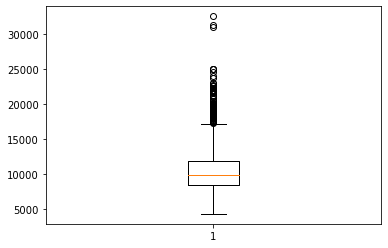

In [1404]:
plt.boxplot(df_test["Price"],autorange=True)


(array([110., 706., 343., 114.,  75.,  59.,  22.,   4.,   0.,   3.]),
 array([ 4350.,  7165.,  9980., 12795., 15610., 18425., 21240., 24055.,
        26870., 29685., 32500.]),
 <BarContainer object of 10 artists>)

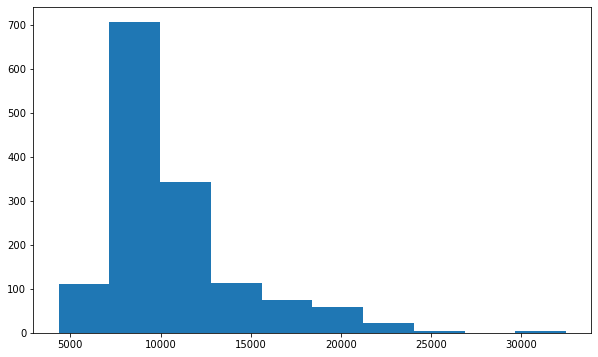

In [1405]:
plt.figure(figsize=(10,6))
plt.hist(df_test["Price"],bins=10)

In [1406]:
df_filtered=df_test[(df_test["Price"]<=19000) & (df_test["Price"]>5000)]
df_filtered.shape



(1372, 25)

{'whiskers': [<matplotlib.lines.Line2D at 0x220d9f7a710>,
 'caps': [<matplotlib.lines.Line2D at 0x220d9f7ab90>,
 'boxes': [<matplotlib.lines.Line2D at 0x220d9f7a440>],
 'medians': [<matplotlib.lines.Line2D at 0x220d9f7b130>],
 'fliers': [<matplotlib.lines.Line2D at 0x220d9f7b400>],
 'means': []}

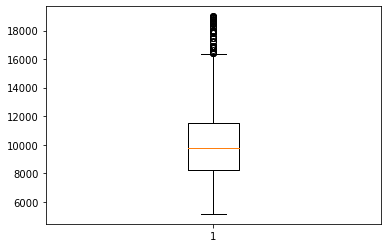

In [1407]:
plt.boxplot(df_filtered["Price"],autorange=True)

(array([ 44., 183., 382., 282., 229.,  86.,  44.,  42.,  35.,  45.]),
 array([ 5150.,  6535.,  7920.,  9305., 10690., 12075., 13460., 14845.,
        16230., 17615., 19000.]),
 <BarContainer object of 10 artists>)

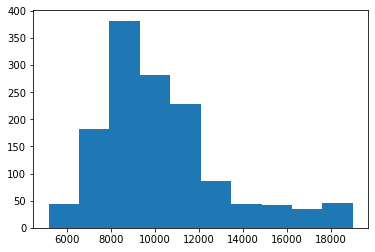

In [1408]:
plt.hist(df_filtered["Price"],bins=10)

TRATAMIENTO DE LA VARIABLE DUMMY

In [1409]:
dummies=pd.get_dummies(df_filtered["Fuel_Type"])
df_filtered=df_filtered.drop(columns=["Fuel_Type"])

df_filtered[dummies.columns]=dummies


In [1410]:
df_filtered.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Price,1372.0,10267.546647,2794.543072,5150.0,8250.0,9750.0,11500.0,19000.0
Mfg_Year,1372.0,1999.473761,1.384518,1998.0,1998.0,1999.0,2000.0,2004.0
KM,1372.0,70368.159621,36502.856049,1.0,45235.5,64983.0,88485.0,243000.0
HP,1372.0,100.655977,12.728713,69.0,86.0,110.0,110.0,116.0
Met_Color,1372.0,0.671283,0.469918,0.0,0.0,1.0,1.0,1.0
cc,1372.0,1568.787901,430.738999,1300.0,1400.0,1600.0,1600.0,16000.0
Doors,1372.0,4.011662,0.952487,2.0,3.0,4.0,5.0,5.0
Quarterly_Tax,1372.0,85.348397,38.363301,19.0,69.0,85.0,85.0,234.0
Mfr_Guarantee,1372.0,0.405977,0.491259,0.0,0.0,0.0,1.0,1.0
Guarantee_Period,1372.0,3.793003,2.920439,3.0,3.0,3.0,3.0,36.0


<h1 style="color: cyan">NORMALIZACION</h1>

In [1411]:
scaler=MinMaxScaler()
norm_data=scaler.fit_transform(df_filtered)
dataset=pd.DataFrame(norm_data,columns=df_filtered.columns.values)
dataset.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Price,1372.0,0.369498,0.201772,0.0,0.223827,0.332130,0.458484,1.0
Mfg_Year,1372.0,0.245627,0.230753,0.0,0.000000,0.166667,0.333333,1.0
KM,1372.0,0.289578,0.150218,0.0,0.186151,0.267417,0.364133,1.0
HP,1372.0,0.673531,0.270824,0.0,0.361702,0.872340,0.872340,1.0
Met_Color,1372.0,0.671283,0.469918,0.0,0.000000,1.000000,1.000000,1.0
cc,1372.0,0.018285,0.029302,0.0,0.006803,0.020408,0.020408,1.0
Doors,1372.0,0.670554,0.317496,0.0,0.333333,0.666667,1.000000,1.0
Quarterly_Tax,1372.0,0.308597,0.178434,0.0,0.232558,0.306977,0.306977,1.0
Mfr_Guarantee,1372.0,0.405977,0.491259,0.0,0.000000,0.000000,1.000000,1.0
Guarantee_Period,1372.0,0.024030,0.088498,0.0,0.000000,0.000000,0.000000,1.0


<h1>FEATURE SELECTION</h1>

In [1412]:
Y=df_filtered[["Price"]]
X=dataset.drop(columns=["Price"])

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_1368\615492939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["Price"]=np.log(Y["Price"])


(array([ 10.,  38., 127., 226., 303., 298., 153.,  91.,  60.,  66.]),
 array([8.54675199, 8.67729622, 8.80784045, 8.93838467, 9.0689289 ,
        9.19947313, 9.33001735, 9.46056158, 9.59110581, 9.72165003,
        9.85219426]),
 <BarContainer object of 10 artists>)

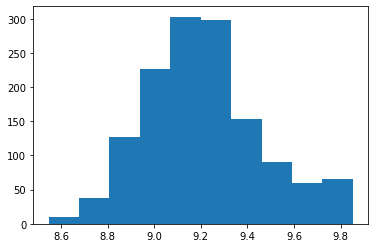

In [1413]:
Y["Price"]=np.log(Y["Price"])
plt.hist(Y["Price"],bins=10)

<h1 style="color:yellow">BEST SUBSET SELECTION</h1>

<h3 style="color:yellow">MEJORES MODELOS</h3>

In [1414]:
#EJECUTAMOS SELECT BEST SUBSET CON K=[1,10]
X_news=[]
df_selectKbest=[]

for i in range(10):
    selector=SelectKBest(f_regression,k=i+1)
    X_news.append(selector.fit_transform(X,Y))
    filter=selector.get_support()
    new_features=X.columns.values[filter]
    df_selectKbest.append(pd.DataFrame(X_news[i],columns=np.array(new_features,dtype=str)))



c:\Users\USUARIO\.conda\envs\datamining\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USUARIO\.conda\envs\datamining\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USUARIO\.conda\envs\datamining\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USUARIO\.conda\envs\datamining\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d arr

In [1415]:
#entrenamos los modelos de regresión lineal con los mejores sub conjuntos de predictores encontrados
models=[]
x_tests=[]
y_tests=[]
for i in range(10):
    x_train, x_test, y_train, y_test= train_test_split(df_selectKbest[i],Y,test_size=0.3,random_state=42,shuffle=True)
    x_train=x_train.reset_index(drop=True)
    x_test=x_test.reset_index(drop=True)
    y_train=y_train.reset_index(drop=True)
    y_test=y_test.reset_index(drop=True)
    
    x_tests.append(x_test)
    y_tests.append(y_test)
    model=sm.OLS(y_train,sm.add_constant(x_train))
    ml_results=model.fit()
    models.append(ml_results)

In [1416]:
#visualizamos los resultados de cada modelo
R_squared_adj=[]
BIC=[]
AIC=[]
RSS=[]
for model in models:
    R_squared_adj.append(model.rsquared_adj)
    BIC.append(model.bic)
    AIC.append(model.aic)
    RSS.append(model.ssr)


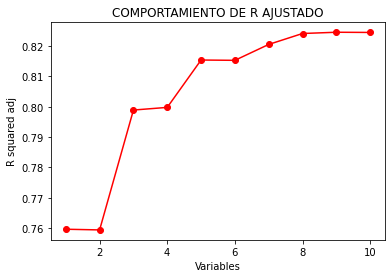

In [1417]:
#graficamos los r ajustados
x_val=range(1,11)
y_val=R_squared_adj
plt.plot(x_val,y_val,marker='o',color="red")
plt.title("COMPORTAMIENTO DE R AJUSTADO")
plt.xlabel("Variables")
plt.ylabel("R squared adj")
plt.show()

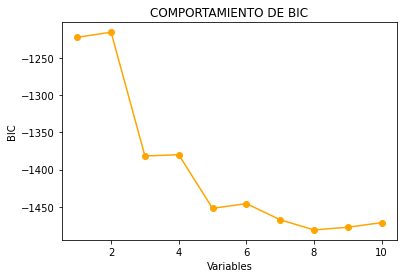

In [1418]:
#graficamos los criterios bayesianos 
x_val=range(1,11)
y_val=BIC
plt.plot(x_val,y_val,marker='o',color="orange")
plt.title("COMPORTAMIENTO DE BIC")
plt.xlabel("Variables")
plt.ylabel("BIC")
plt.show()

In [1419]:


#mostramos los Mallow's Cp
"""Cps=[]

parametros
mse=0
for i in range(10):
    y_mg_pred=model_general_results.predict(sm.add_constant(X))
    y_m_pred=models[i].predict(sm.add_constant())
    Cps.append(mallow.mallow(Y,y_mg_pred,y_m_pred, 27,5))

print(Cps)

#graficamos
x_val=range(1,11)
y_val= Cps
plt.plot(x_val,y_val,marker='o',color="cyan")
plt.title("COMPORTAMIENTO DE RSS")
plt.xlabel("Variables")
plt.ylabel("RSS")
plt.show()"""


'Cps=[]\n\nparametros\nmse=0\nfor i in range(10):\n    y_mg_pred=model_general_results.predict(sm.add_constant(X))\n    y_m_pred=models[i].predict(sm.add_constant())\n    Cps.append(mallow.mallow(Y,y_mg_pred,y_m_pred, 27,5))\n\nprint(Cps)\n\n#graficamos\nx_val=range(1,11)\ny_val= Cps\nplt.plot(x_val,y_val,marker=\'o\',color="cyan")\nplt.title("COMPORTAMIENTO DE RSS")\nplt.xlabel("Variables")\nplt.ylabel("RSS")\nplt.show()'

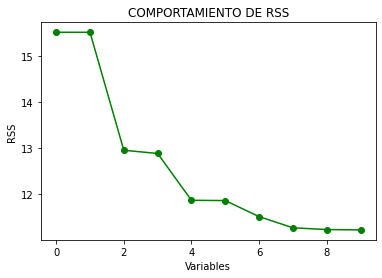

In [1420]:
#graficamos los r ajustados
x_val=range(10)
y_val= RSS
plt.plot(x_val,y_val,marker='o',color="green")
plt.title("COMPORTAMIENTO DE RSS")
plt.xlabel("Variables")
plt.ylabel("RSS")
plt.show()

<h3>Conclusiones:</h3>
Según lo mostrado en las gráficas

In [1421]:

print(models[7].summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     562.9
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:06:03   Log-Likelihood:                 771.47
No. Observations:                 960   AIC:                            -1525.
Df Residuals:                     951   BIC:                            -1481.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.0768      0.013    7

<h1 style="color: lightgreen">METODOS DE CONTRACCION</h1>

In [1422]:
Y=df_filtered[["Price"]]
Y["Price"]=np.log(Y["Price"])
X=dataset.drop(columns=["Price"])

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_1368\1347877090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["Price"]=np.log(Y["Price"])


In [1423]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=42)

In [1424]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((960, 26), (412, 26), (960, 1), (412, 1))

In [1425]:
X.shape, Y.shape

((1372, 26), (1372, 1))

<h3 style="color: cyan">REGRESION RIDGE</h3>

BUSQUEDA DE HIPERPARÁMETROS: LAMBDA /\

In [1426]:

kfold_param = {
    'n_splits':10,
    'shuffle':True,
    'random_state':42
}
kfold = KFold(**kfold_param)

clf_dt_3 = Ridge()

grid_param = {
    'alpha':[1.0,0.1,0.001,0.01,10,100],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}

grid = RandomizedSearchCV(clf_dt_3, grid_param, cv=kfold, scoring="r2", random_state=42)
grid_results = grid.fit(x_train, y_train)

In [1427]:
print(grid_results)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Ridge(),
                   param_distributions={'alpha': [1.0, 0.1, 0.001, 0.01, 10,
                                                  100],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga', 'lbfgs']},
                   random_state=42, scoring='r2')


In [1428]:
grid_results.best_params_

{'solver': 'sparse_cg', 'alpha': 0.1}

ENTRENAMOS MODELO RIDGE

In [1429]:
ridge=Ridge(alpha=0.1,solver='sparse_cg')

ridge.fit(x_train,y_train)

y_pred=ridge.predict(x_test)

print("Mean squared error: ", mean_squared_error(y_test,y_pred))

Mean squared error:  0.009965510267727372


In [1430]:
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test,y_pred)))

Root mean squared error:  0.09982740238896018


In [1431]:
print(pd.DataFrame(ridge.coef_,columns=X.columns.values).T)

                         0
Mfg_Year          0.710134
KM               -0.431680
HP                0.084840
Met_Color        -0.005377
cc                0.005287
Doors             0.047896
Quarterly_Tax     0.185025
Mfr_Guarantee     0.040200
Guarantee_Period  0.126457
ABS               0.000346
Airbag_1          0.006829
Airbag_2         -0.010713
Airco             0.031003
Automatic_airco   0.115922
Boardcomputer    -0.008251
CD_Player         0.021858
Central_Lock      0.006755
Powered_Windows   0.031743
Mistlamps         0.005738
Sport_Model       0.010962
Backseat_Divider -0.000153
Metallic_Rim      0.008625
Tow_Bar          -0.014934
CNG              -0.061944
Diesel            0.044510
Petrol            0.017435


<h3 style="color: violet">REGRESION LASSO</h3>

In [1432]:
kfold_param = {
    'n_splits':10,
    'shuffle':True,
    'random_state':42
}
kfold = KFold(**kfold_param)

clf_dt_3 = Lasso()

grid_param = {
    'alpha':[1.0,0.1,0.001,0.01,10,100,0.03,0.003,0.3],
    'selection':['cyclic', 'random']
}

grid = RandomizedSearchCV(clf_dt_3, grid_param, cv=kfold, scoring="r2", random_state=42)
grid_results = grid.fit(x_train, y_train)

In [1433]:
grid_results.best_params_

{'selection': 'random', 'alpha': 0.001}

ENTRENAMOS MODELO LASSO

In [1434]:
lasso=Lasso(alpha=0.001,selection='random')

lasso.fit(x_train,y_train)

y_pred=lasso.predict(x_test)


In [1435]:
mean_squared_error(y_pred,y_test)

0.010269572668128949

In [1436]:
np.sqrt(mean_squared_error(y_pred,y_test))

0.1013389000736092

In [1437]:
coef=pd.DataFrame(lasso.coef_)
columns=pd.DataFrame(X.columns.values)
columns.columns=["names"]

n=coef.assign(names=columns["names"])
n.columns=["values","names"]
n["values"]=np.abs(n["values"])
print(n.sort_values("values",ascending=False))

      values             names
0   0.723831          Mfg_Year
1   0.380944                KM
13  0.085528   Automatic_airco
6   0.083008     Quarterly_Tax
2   0.054892                HP
5   0.042664             Doors
7   0.037278     Mfr_Guarantee
12  0.034807             Airco
24  0.033697            Diesel
17  0.026332   Powered_Windows
15  0.013187         CD_Player
16  0.013108      Central_Lock
22  0.007582           Tow_Bar
18  0.006020         Mistlamps
19  0.003899       Sport_Model
11  0.002475          Airbag_2
21  0.000000      Metallic_Rim
20  0.000000  Backseat_Divider
23  0.000000               CNG
3   0.000000         Met_Color
14  0.000000     Boardcomputer
4   0.000000                cc
10  0.000000          Airbag_1
9   0.000000               ABS
8   0.000000  Guarantee_Period
25  0.000000            Petrol
